<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_OB/blob/%ED%95%84%EC%82%AC/CH3_1~3_HW1120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#03. 케라스(keras)

##01. 딥러닝 준비

###1. 주요 용어

1. 하이퍼파라미터
* 딥러닝, 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값을 말함
* 모델의 예측 성능을 높이기 위해 하이퍼파라미터 값들을 조절함

2. 과소적합, 과대적합
* 과소적합 : 모델이 충분히 학습되지 않은 경우
* 과대적합 : 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태

3. 에포크
* 딥러닝 : 데이터셋을 학습하는 과정을 여러번 반복하면서 최적의 모델 가중치를 찾는 과정
* 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프

4. 손실함수
* 예측 값과 정답 값의 차이 또는 오차

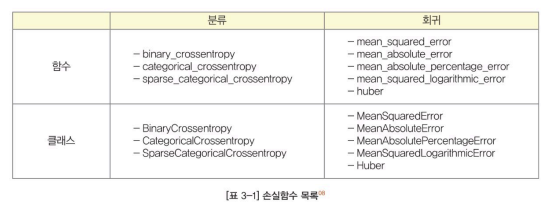

In [1]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

5. 경사하강법
* 딥러닝 모델을 훈련할 때 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최ㅗ 함수 값을 갖도록 하는 방법
* 손실함수 : 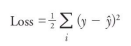

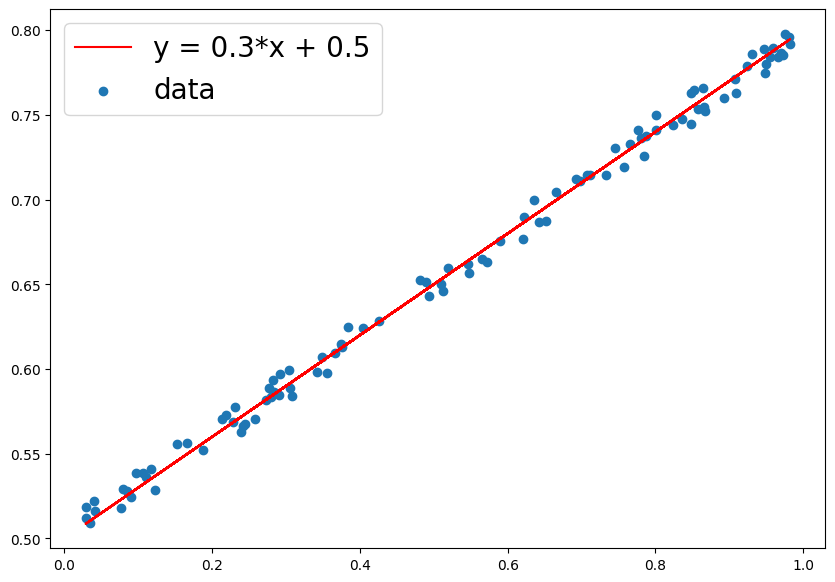

w:0.3,b:0.5


In [2]:
#gradient_descent
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5,b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y = {w}*x + {b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w},b:{b}')
  return x,yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [3]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch,w,b,error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch,w,b,error))

 0 w = 0.02762, b = 0.72195 error = 2.25777
 5 w = 0.04855, b = 0.64329 error = 0.31407
10 w = 0.08971, b = 0.61954 error = 0.21832
15 w = 0.12412, b = 0.59999 error = 0.15195
20 w = 0.15278, b = 0.58370 error = 0.10592
25 w = 0.17664, b = 0.57014 error = 0.07399
30 w = 0.19651, b = 0.55885 error = 0.05185
35 w = 0.21307, b = 0.54944 error = 0.03649
40 w = 0.22685, b = 0.54161 error = 0.02583
45 w = 0.23833, b = 0.53508 error = 0.01845
50 w = 0.24789, b = 0.52965 error = 0.01332
55 w = 0.25585, b = 0.52512 error = 0.00977
60 w = 0.26248, b = 0.52136 error = 0.00730
65 w = 0.26800, b = 0.51822 error = 0.00559
------------------------------------------------------------
68 w = 0.3, b = 0.5 error = 0.00483


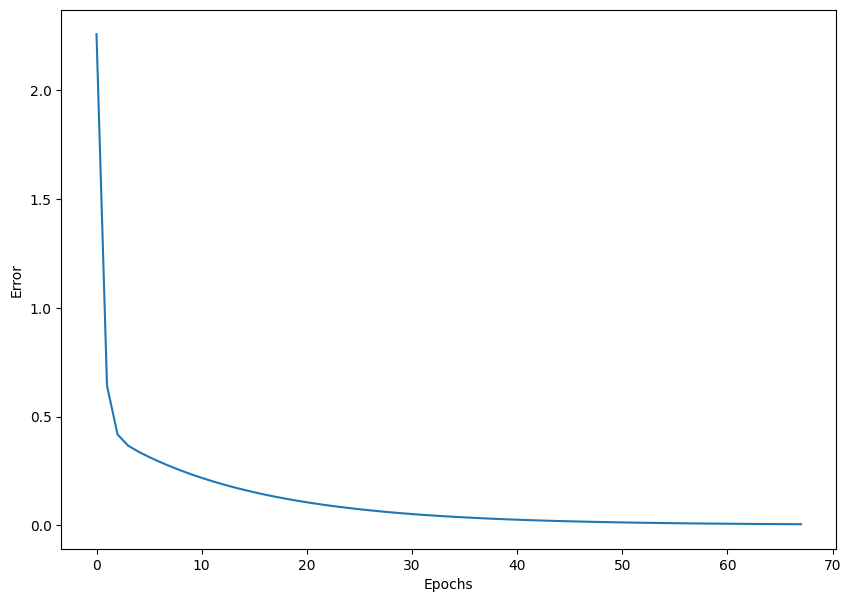

In [4]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

-> 가중치가 난수 값에 의해 다르게 초기화되기 때문에 매번 실행할 때마다 수렴하는 속도는 차이가 있음. 하지만 결국 목표하는 오차 범위 안으로 수렴하여 반복문을 종료하게 되고, 종료 후 w,b 계수를 확인하면 샘플 데이터셋을 생성할 때 설정한 w,b 계수와 비슷한 값임을 확인할 수 있음

###2. 딥러닝 프로세스

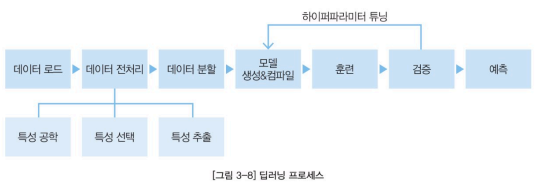

1. 데이터 전처리
* 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계

2. 모델 생성
* 모델의 구조를 정의하고 생성하는 단계

3. 모델 컴파일
* 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의함

4. 모델 훈련
* 모델을 훈련하는 단계

5. 모델 검증
* 훈련이 완료된 모델을 검증하는 단계. 반환된 검증 결과를 토대로 잠재적인 모델의 성능 평가가 이루어짐

6. 모델 예측
* 훈련과 검증이 완료된 모델로 테스트셋에 대해 모델이 예측하고 그 결과를 반환함

##02. 단순 신경망 훈련

###1. 선형 회귀

* 회귀 분석 : 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계기법
* 단순선형회귀: y=ax+b

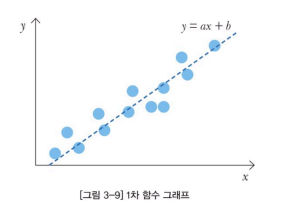

###2. 뉴런

* 인공 신경망 모델을 구성하는 하나의 신경을 의미함
* 뉴런 = 노드
* 신경망은 여러 개의 layer를 가지며 1개의 layer는 1개 이상의 뉴런으로 구성됨

###3.Dense 레이어

* 심층 신경망 모델을 구성하는 가장 기본 레이어
* 각 레이어 사이에 모든 뉴런이 서로 연결되어 완전 연결층이라고 부르기도 함

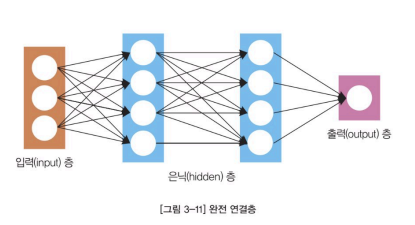

In [5]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

###4. 데이터셋 만들기

In [6]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


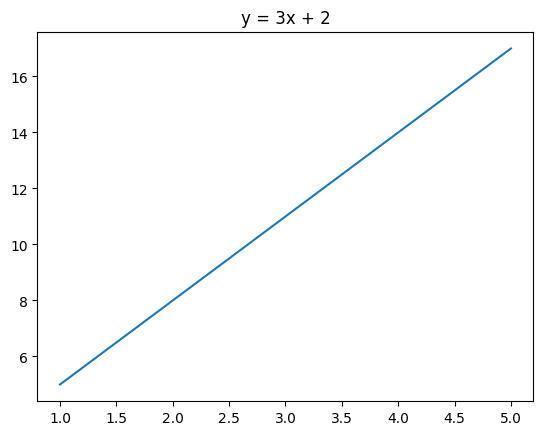

In [7]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

###5. Sequential API

* 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식. 입력 레이어부터 출력 레이어까지 순서를 가짐

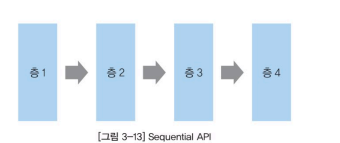

1. 모델 구조

[모델 구성 방식]

1. 리스트형 정의로 Sequential 클래스 함수에 리스트 형태로 여러 개의 층을 입력

2. add 함수로 레이어 추가로 sequential 클래스 객체를 먼저 만든 뒤, 생성된 모델 인스턴스에 층을 추가하는 방식

In [8]:
import tensorflow as tf
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
])

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

2. 입력 데이터 형태

* input_shape 매개 변수는 주입할 데이터셋의 shape를 튜플 혹은 리스트로 지정할 수 있음

* ex : 데이터셋 shape이 (150,4)이면 input_shape은 (4,)로 지정

In [10]:
import tensorflow as tf

model = tf.keras.Sequential([
  # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정
  tf.keras.layers.Dense(10, input_shape=[4]),
  tf.keras.layers.Dense(5),
  tf.keras.layers.Dense(1)
])

데이터셋의 shape(150,4) : 150개 샘플에 대해 4개의 입력 변수 존재

3. 단순선형회귀 모델 정의

* 1개의 뉴런을 가지는 Dense 레이어 한 개를 사용함

In [11]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

### 6. 모델 요약

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###7. 컴파일

In [13]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [14]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [15]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
              ])

옵티마이저 : sgd

손실함수 : mse

평가지표 : mae

In [16]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

###8. 훈련

* 모델 훈련 : 가중치 텐서를 업데이트하는 과정

In [17]:
#훈련
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 962ms/step - loss: 113.8161 - mae: 9.9827
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 66.4292 - mae: 7.6669
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 38.8138 - mae: 5.8988
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 22.7202 - mae: 4.5490
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 13.3409 - mae: 3.5184


모든 epoch에서 모델의 예측 오차가 계속해서 줄어드는 것을 확인 ->
반복 훈련 횟수가 충분하지 않아 학습이 덜 되었다고 볼 수 있음 -> 과소적합 상태라고 볼 수 있음

In [18]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 330ms/step - loss: 142.1616 - mae: 11.1209
Epoch 2/1200
1/1 [==============================] - 0s 9ms/step - loss: 82.9312 - mae: 8.5319
Epoch 3/1200
1/1 [==============================] - 0s 9ms/step - loss: 48.4140 - mae: 6.5553
Epoch 4/1200
1/1 [==============================] - 0s 11ms/step - loss: 28.2985 - mae: 5.0463
Epoch 5/1200
1/1 [==============================] - 0s 10ms/step - loss: 16.5756 - mae: 3.8943
Epoch 6/1200
1/1 [==============================] - 0s 11ms/step - loss: 9.7436 - mae: 3.0146
Epoch 7/1200
1/1 [==============================] - 0s 9ms/step - loss: 5.7616 - mae: 2.3430
Epoch 8/1200
1/1 [==============================] - 0s 10ms/step - loss: 3.4405 - mae: 1.8301
Epoch 9/1200
1/1 [==============================] - 0s 9ms/step - loss: 2.0874 - mae: 1.4385
Epoch 10/1200
1/1 [==============================] - 0s 9ms/step - loss: 1.2983 - mae: 1.1394
Epoch 11/1200
1/1 [==============================] - 0s 

-> 충분한 epoch동안 훈련한 후 mse, mae 모두 개선됨

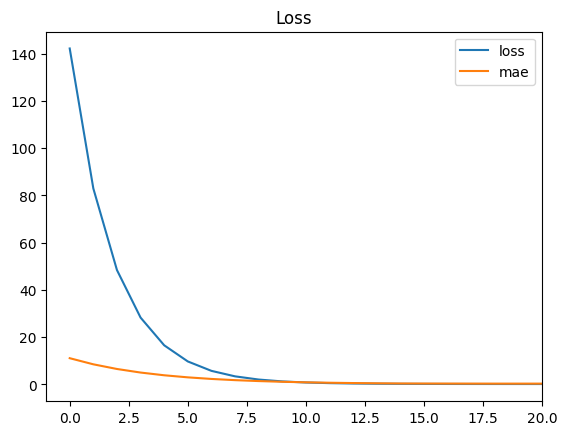

In [19]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

-> 모델 훈련 초기에는 학습이 매우 빠른 속도로 진행되다가 일정 epoch 이후에는 학습 속도가 느려지는 패턴을 보임

###9. 검증

In [20]:
# 검증
model.evaluate(x,y)

1/1 [==============================] - 0s 247ms/step - loss: 6.2129e-05 - mae: 0.0068


[6.212939479155466e-05, 0.006765556521713734]

###10. 예측

In [21]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 207ms/step


array([[32.0327]], dtype=float32)

데이터셋 생성 시 정의한 1차식 : y=3x+2, x=10일 때 y=32


-> x=10일 때 y 예측값 =32.0327 -> 정답에 꽤 근사함

##03. 심층 신경망으로 이미지 분류

###1. 케라스 내장 데이터셋 로드

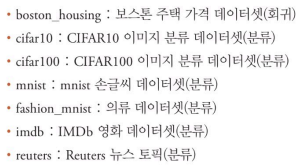

In [22]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [23]:
# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


배열의 shape : (데이터셋의 크기, 이미지의 세로 픽셀 크기, 이미지의 가로 픽셀 크기)

In [24]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


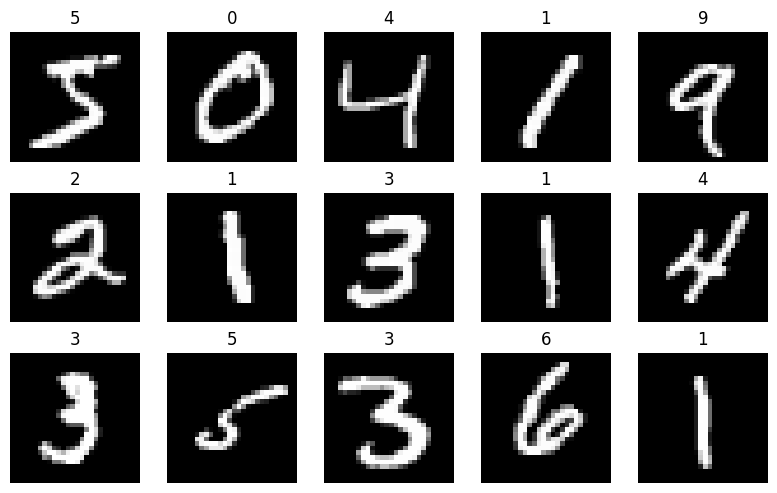

In [25]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

###2. 데이터 전처리

In [26]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

데이터의 값이 0 ~ 255 범위의 값으로 이루어짐 -> 범위를 0~1 사이의 값을 가지도록 정규화하기 위해서 데이터의 최대값인 255로 나눔

In [27]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [28]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [29]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

###3. Flatten 레이어

샘플 이미지의 형태는 (28,28) -> 2차원 입력으로 볼 수 있음

Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야함 -> 이미지 데이터를 1차원으로 전처리하여 주입해야 함

In [30]:
print(f'변경 전 shape:{x_train.shape}')
print(f'ID으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape:(60000, 28, 28)
ID으로 shape 변경 후: (60000, 784)


In [31]:
# 다차원 데이터를 1차원으로 펼쳐주는 방법
print(f'변경 전 shape:{x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후:{tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)
Flatten 적용 후:(60000, 784)


###4. 활성화 함수

* 입력을 비선형 출력으로 변환해주는 함수
* 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 함

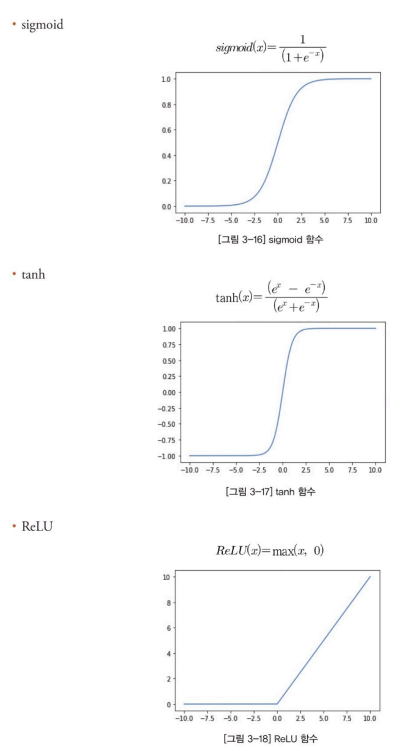

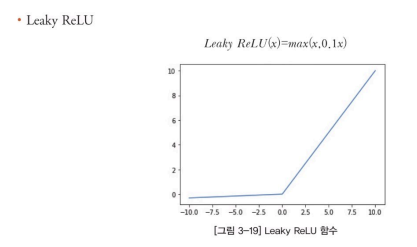

In [32]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [33]:
# Dense 레이어와 relu 활성호 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

###5. 입력과 출력

분류 모델의 가장 마지막 레이어는 출력층임. 출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야 함

mnist : 0~9까지 총 10개의 클래스 -> 마지막 출력층 노드 개수는 10개가 되어야 함

In [34]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        # 노드 = 10개(클래스 개수와 동일)
        tf.keras.layers.Dense(10, activation='softmax'),
])

In [35]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

###6. 손실 함수

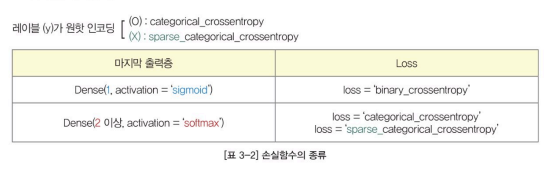

In [36]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [ ]:
# y가 원핫 벡터인 경우
# [0.,0.,0.,0.,0.,1.,0.,0.,0.,0.]
model.compile(loss='categorical_crossentropy')

# y가 원핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

###7. 옵티마이저

* 손실을 낮추기 위해서 신경망의 학습률과 가중치와 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법

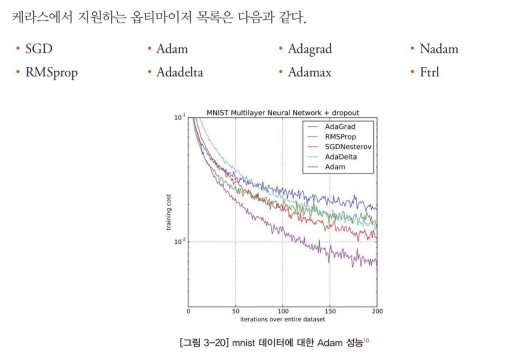

In [37]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

###8. 평가지표

In [38]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [39]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###9. 훈련

In [40]:
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 12ms/step - loss: 0.2240 - accuracy: 0.9335 - val_loss: 0.1160 - val_accuracy: 0.9628
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0946 - accuracy: 0.9711 - val_loss: 0.0977 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0664 - accuracy: 0.9791 - val_loss: 0.0908 - val_accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0505 - accuracy: 0.9838 - val_loss: 0.0779 - val_accuracy: 0.9767
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0997 - val_accuracy: 0.9715
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.0793 - val_accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0285 - accuracy: 0.9904 - val_loss: 0.1022 - val_a

###10. 평가

In [41]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1146 - accuracy: 0.9762
검증 셋 정확도: 0.9761999845504761


-> 검증 성능이 약 97.9%

###11. 예측

훈련된 모델로 새로운 이미지에 대한 분류 값을 예측하는 작업을 수행할 수 있음

In [42]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [43]:
# 예측 결과 출력
predictions[0]

array([6.2971774e-13, 3.9243769e-08, 2.1910993e-09, 8.7527830e-08,
       4.0664369e-10, 6.1949845e-10, 3.3535910e-17, 9.9999934e-01,
       1.5941945e-12, 4.4607677e-07], dtype=float32)

-> 모델의 마지막 출력층의 노드 개수가 10개로 지정되었기 때문에 10개의 값이 출력됨. 각 출력값은 순차적으로 0~9까지의 개별 클래스에 대한 분류 확률값을 나타냄. 이 중 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스임

In [44]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


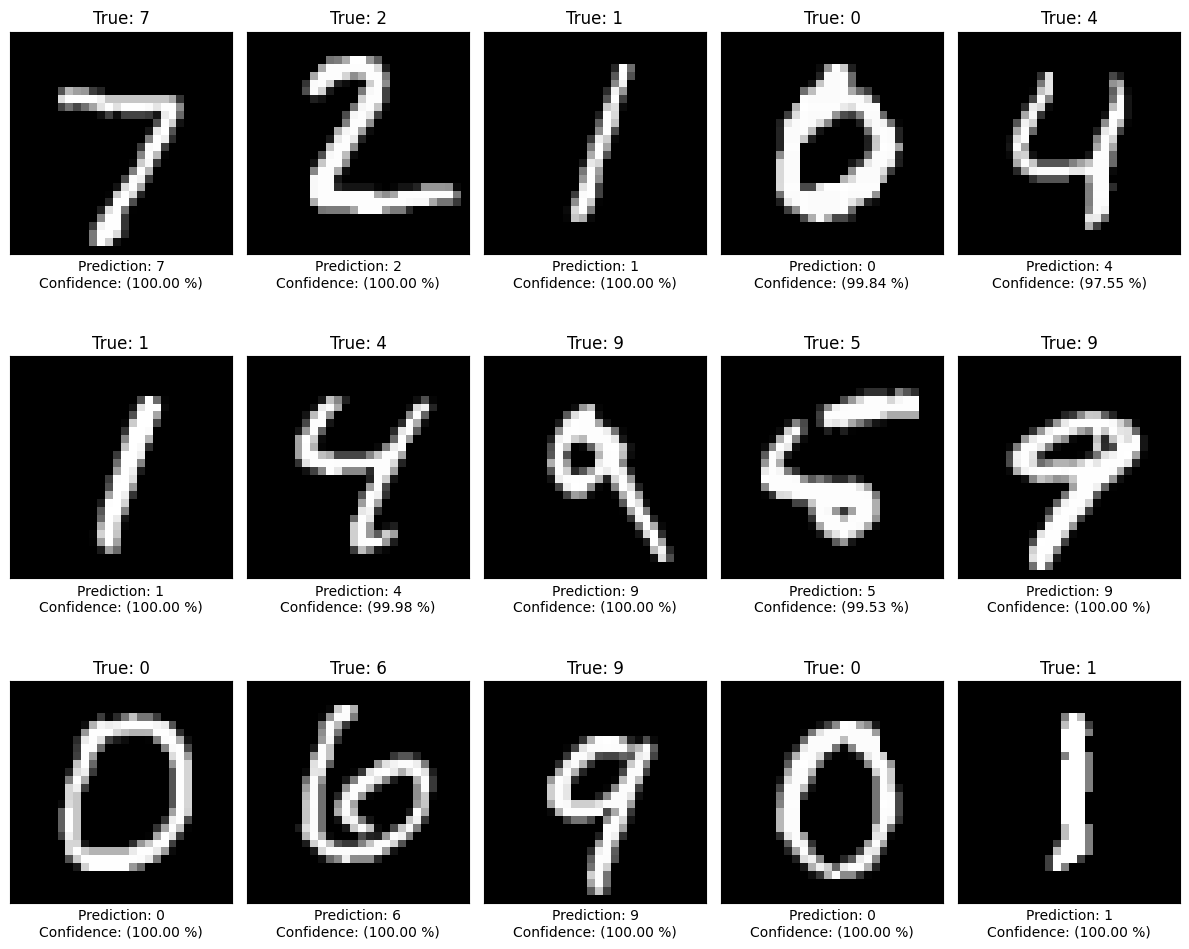

In [45]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()